In [86]:
import pandas as pd
import numpy as np

# Display all columns
from IPython.display import display
pd.options.display.max_columns = None

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Split train/test
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Label Encode
from sklearn.preprocessing import label_binarize

# Feature Scaling (normalize)
from sklearn.preprocessing import RobustScaler

# SVM
from sklearn import svm

# Logistic Regression
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Confusion Matrix
from sklearn.metrics import confusion_matrix

# ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score


from sklearn.metrics import r2_score

Web Watson Analytics IBM
https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
display(df.head())


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Question

Can we predict the amount claimed by a client?

### Data Cleaning and Exploratory Analysis

In [3]:
# Columns of dataset
print( len(df.columns))
print(df.columns)
print(df.info())

24
Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
Employ

In [4]:
# Missing values
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
# Know the unique values for each column
for item in df.columns.tolist():
    print(item, len(df[item].unique()))

Customer 9134
State 5
Customer Lifetime Value 8041
Response 2
Coverage 3
Education 5
Effective To Date 59
EmploymentStatus 5
Gender 2
Income 5694
Location Code 3
Marital Status 3
Monthly Premium Auto 202
Months Since Last Claim 36
Months Since Policy Inception 100
Number of Open Complaints 6
Number of Policies 9
Policy Type 3
Policy 9
Renew Offer Type 4
Sales Channel 4
Total Claim Amount 5106
Vehicle Class 6
Vehicle Size 3


### Categorical Variable

#### Effective To Date

In [268]:
# Change the type to ordinal.
print(df['Effective To Date'].dtype)
print(df['Effective To Date'].head())
print('''''')
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])
print(df['Effective To Date'].dtype)
print(df['Effective To Date'].min())
print(df['Effective To Date'].max())
print(df['Effective To Date'].dt.year.value_counts())
print(df['Effective To Date'].dt.month.value_counts())
print('''''')

df['Effective To Date'] = df['Effective To Date'].apply(lambda x: x.toordinal())

int64
0    719163
1    719163
2    719163
3    719163
4    719163
Name: Effective To Date, dtype: int64

datetime64[ns]
1970-01-01 00:00:00.000719163
1970-01-01 00:00:00.000719163
1970    9134
Name: Effective To Date, dtype: int64
1    9134
Name: Effective To Date, dtype: int64



#### Customers
Drop customer columns, it's not relevant for our model. 

In [269]:
# Unique value for each customer
print('type', df.Customer.dtype)
print(df.Customer.head())
print(len(df.Customer.unique()))

df.drop(labels=['Customer'], axis=1, inplace=True)

AttributeError: 'DataFrame' object has no attribute 'Customer'

#### State



In [12]:
print('type', df.State.dtype)
print(df.State.unique())
print(len(df.State.unique()))
print((df.State.value_counts()/ sum(df.State.value_counts()))*100)
a =df.State.value_counts()

type object
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
5
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: State, dtype: float64


#### Response

In [270]:
print('type', df['Response'].dtype)
print(df['Response'].unique())
print((df.Response.value_counts()/sum(df.State.value_counts()))*100)

type object
['No' 'Yes']
No     85.679877
Yes    14.320123
Name: Response, dtype: float64


#### Coverage

In [14]:
print('type', df.Coverage.dtype)
print(df.Coverage.unique())
print(len(df.Coverage.unique()))
print((df.Coverage.value_counts()/ sum(df.Coverage.value_counts()))*100)

type object
['Basic' 'Extended' 'Premium']
3
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: Coverage, dtype: float64


#### Education

In [15]:
print('type', df.Education.dtype)
print(df.Education.unique())
print(len(df.Education.unique()))
print((df.Education.value_counts()/ sum(df.Education.value_counts()))*100)

type object
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
5
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: Education, dtype: float64


#### EmploymentStatus

In [16]:
print('type', df.EmploymentStatus.dtype)
print(df.EmploymentStatus.unique())
print(len(df.EmploymentStatus.unique()))
print((df.EmploymentStatus.value_counts()/ sum(df.EmploymentStatus.value_counts()))*100)

type object
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
5
Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64


#### Gender

In [17]:
print('type', df.Gender.dtype)
print(df.Gender.unique())
print(len(df.Gender.unique()))
print((df.Gender.value_counts()/ sum(df.Gender.value_counts()))*100)

type object
['F' 'M']
2
F    50.996278
M    49.003722
Name: Gender, dtype: float64


#### Location Code 

In [18]:
print('type', df['Location Code'].dtype)
print(df['Location Code'].unique())
print(len(df['Location Code'].unique()))
print((df['Location Code'].value_counts()/ sum(df['Location Code'].value_counts()))*100)

type object
['Suburban' 'Rural' 'Urban']
3
Suburban    63.269104
Rural       19.410992
Urban       17.319904
Name: Location Code, dtype: float64


#### Marital Status

In [19]:
print('type', df['Marital Status'].dtype)
print(df['Marital Status'].unique())
print(len(df['Marital Status'].unique()))
print((df['Marital Status'].value_counts()/ sum(df['Marital Status'].value_counts()))*100)

type object
['Married' 'Single' 'Divorced']
3
Married     58.003065
Single      27.008977
Divorced    14.987957
Name: Marital Status, dtype: float64


#### Policy Type

In [20]:
print('type', df['Policy Type'].dtype)
print(df['Policy Type'].unique())
print(len(df['Policy Type'].unique()))
print((df['Policy Type'].value_counts()/ sum(df['Policy Type'].value_counts()))*100)

type object
['Corporate Auto' 'Personal Auto' 'Special Auto']
3
Personal Auto     74.315743
Corporate Auto    21.545873
Special Auto       4.138384
Name: Policy Type, dtype: float64


#### Policy

In [21]:
print('type', df['Policy'].dtype)
print(df['Policy'].unique())
print(len(df['Policy'].unique()))
print((df['Policy'].value_counts()/ sum(df['Policy'].value_counts()))*100)

type object
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
9
Personal L3     37.508211
Personal L2     23.231881
Personal L1     13.575651
Corporate L3    11.101379
Corporate L2     6.514123
Corporate L1     3.930370
Special L2       1.795489
Special L3       1.620320
Special L1       0.722575
Name: Policy, dtype: float64


#### Renew Offer Type

In [22]:
print('type', df['Renew Offer Type'].dtype)
print(df['Renew Offer Type'].unique())
print(len(df['Renew Offer Type'].unique()))
print((df['Renew Offer Type'].value_counts()/ sum(df['Renew Offer Type'].value_counts()))*100)

type object
['Offer1' 'Offer3' 'Offer2' 'Offer4']
4
Offer1    41.077294
Offer2    32.034158
Offer3    15.677688
Offer4    11.210861
Name: Renew Offer Type, dtype: float64


#### Sales Channel

In [23]:
print('type', df['Sales Channel'].dtype)
print(df['Sales Channel'].unique())
print(len(df['Sales Channel'].unique()))
print((df['Sales Channel'].value_counts()/ sum(df['Sales Channel'].value_counts()))*100)

type object
['Agent' 'Call Center' 'Web' 'Branch']
4
Agent          38.066564
Branch         28.103788
Call Center    19.323407
Web            14.506240
Name: Sales Channel, dtype: float64


#### Vehicle Class

In [24]:
print('type', df['Vehicle Class'].dtype)
print(df['Vehicle Class'].unique())
print(len(df['Vehicle Class'].unique()))
print((df['Vehicle Class'].value_counts()/ sum(df['Vehicle Class'].value_counts()))*100)

type object
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
6
Four-Door Car    50.591198
Two-Door Car     20.648128
SUV              19.662798
Sports Car        5.298883
Luxury SUV        2.014451
Luxury Car        1.784541
Name: Vehicle Class, dtype: float64


#### Vehicle Size

In [25]:
print('type', df['Vehicle Size'].dtype)
print(df['Vehicle Size'].unique())
print(len(df['Vehicle Size'].unique()))
print((df['Vehicle Size'].value_counts()/ sum(df['Vehicle Size'].value_counts()))*100)

type object
['Medsize' 'Small' 'Large']
3
Medsize    70.330633
Small      19.312459
Large      10.356908
Name: Vehicle Size, dtype: float64


### Data Visualization

#### Categorical Variable

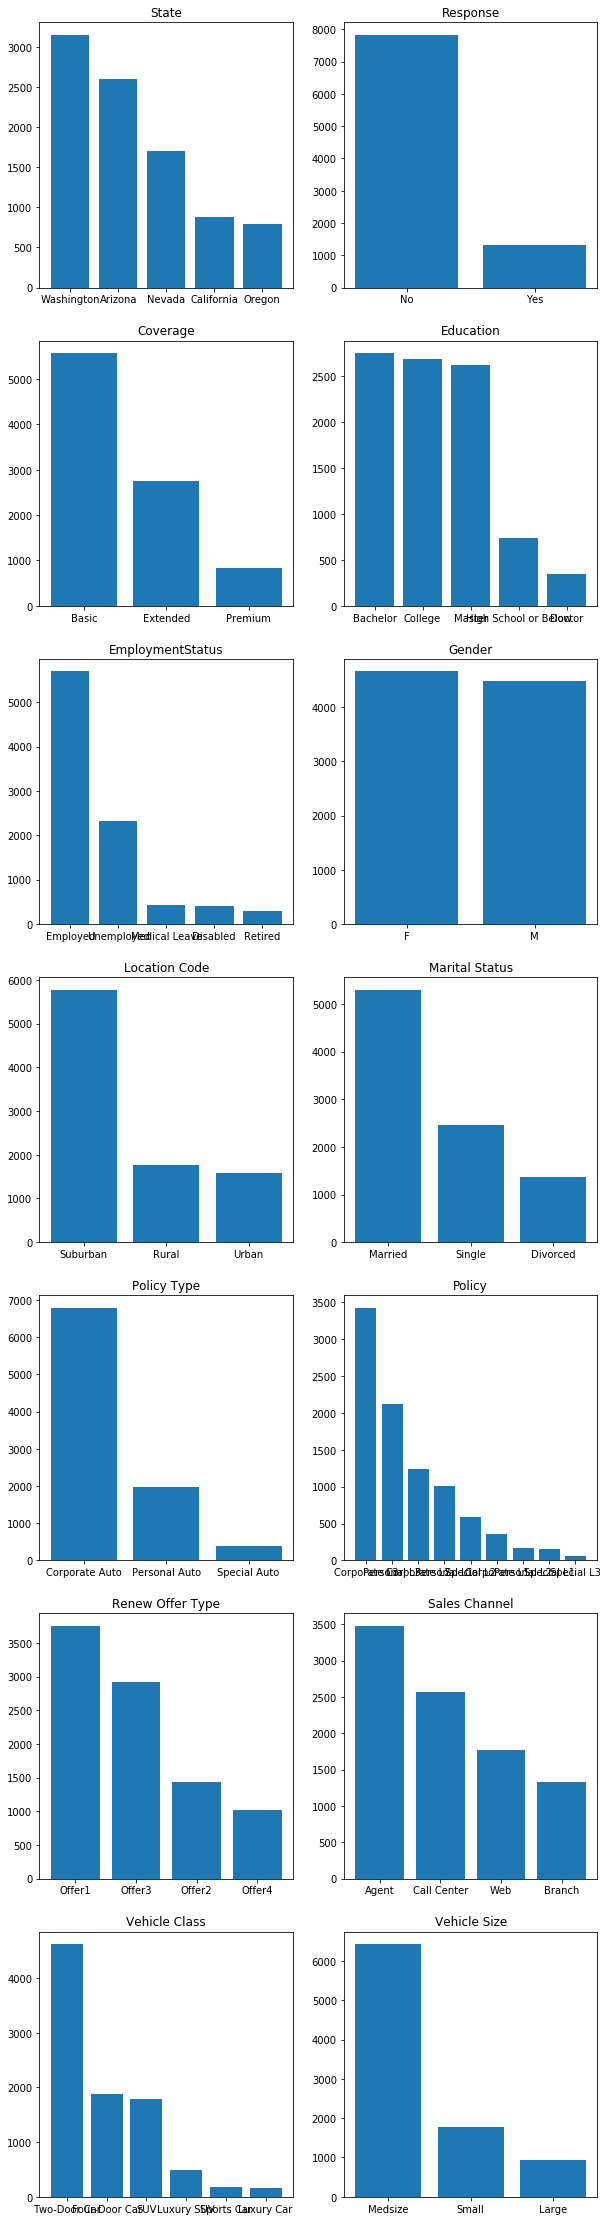

In [26]:
# Bar plot for each categorical variable.
y = [col for col in df.columns if df[col].dtype == object]
fig, axes = plt.subplots(int((len(y)/2)), 2, figsize=(10,40))
for i, x in enumerate(y):
    axes[int(i/2)][i%2].bar(df[x].unique(), df[x].value_counts())
    axes[int(i/2)][i%2].set_title(x)

### Columns - Numerical Variable

In [27]:
df.describe()

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,734166.837749,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,16.942769,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,734138.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,734152.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,734166.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,734181.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,734196.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


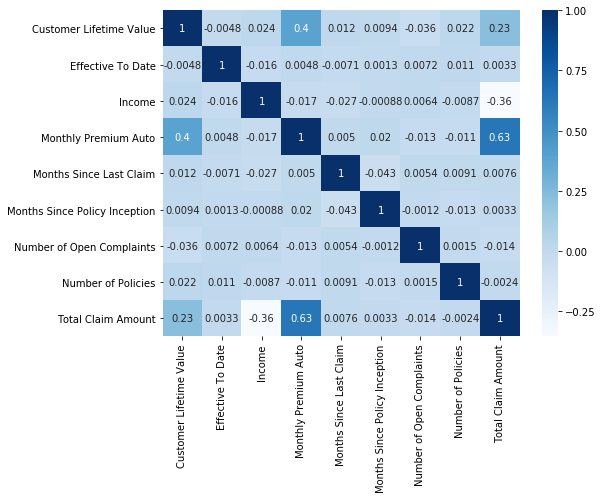

In [28]:
df.corr()
fig, axes = plt.subplots(1,1, figsize=(8,6))
sns.heatmap(df.corr(), cmap=plt.cm.Blues,  annot=True)

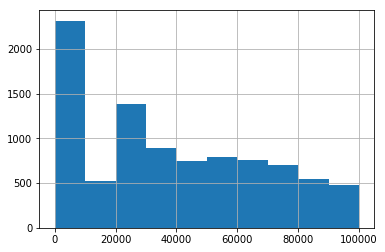

In [29]:
df['Income'].hist()

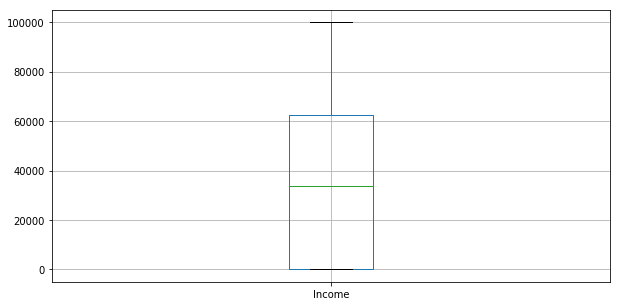

In [30]:
fig, axes = plt.subplots(1,1, figsize=(10,5))
df.boxplot(column='Income')

Numeric_cols = df._get_numeric_data()
fig, axes = plt.subplots(int((len(Numeric_cols)/2)), 2, figsize=(10,40))
for i, x in enumerate(Numeric_cols):
    axes[int(i/2)][i%2].hist(df[x])
    axes[int(i/2)][i%2].set_title(x)

### Total Claim Amount (3 class)

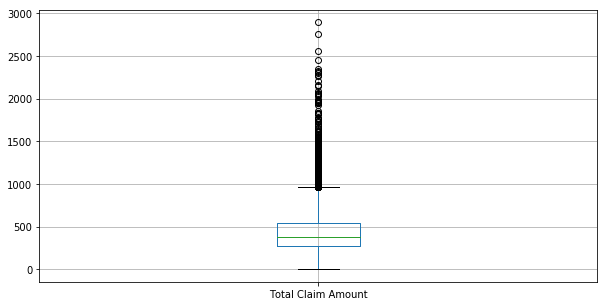

In [31]:
fig, axes = plt.subplots(1,1, figsize=(10,5))
df.boxplot(column='Total Claim Amount')

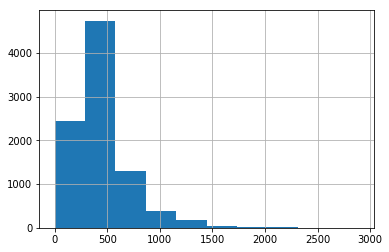

In [32]:
df['Total Claim Amount'].hist()

In [33]:
df['Total Claim Amount'][2334]

0.09900700000000001

In [34]:
Total_claim_min = df['Total Claim Amount'].min()
Total_claim_max = df['Total Claim Amount'].max()
Total_claim_mean = df['Total Claim Amount'].mean()
Total_claim_q1 = df['Total Claim Amount'].quantile(0.25)
Total_claim_q2 = df['Total Claim Amount'].quantile(0.75)
print(Total_claim_min, Total_claim_max, Total_claim_mean, Total_claim_q1, Total_claim_q2)

0.09900700000000001 2893.239678 434.0887943128969 272.2582445 547.5148387500001


In [35]:
#Labels = 0: Low , 1:Moderate, 2:High
cutoffs = [0, Total_claim_q1, Total_claim_q2, Total_claim_max]
df['Total Claim Labels'] = pd.cut(df['Total Claim Amount'],cutoffs, labels=[0,1,2])
print(df['Total Claim Labels'].head())


0    1
1    2
2    2
3    1
4    0
Name: Total Claim Labels, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [36]:
# Problemas con el NAN, el primer valor no lo cogía
df.index[df['Total Claim Labels'].isna() == True].tolist()
df['Total Claim Amount'][2334]

0.09900700000000001

In [37]:
# Cambiar tipo
df['Total Claim Labels'] = df['Total Claim Labels'].astype('int64')
df['Total Claim Labels'].dtype

dtype('int64')

----

## Machine Learning 

Let's convert them to ordinal data using Pandas' get_dummies

In [38]:
#df['Total Claim Labels'].astype(object)
#columns = [col for col in df.columns if (df[col].dtype == object)]
columns=[col for col in df.columns if df[col].dtype == object]

df_model = pd.get_dummies(data=df, columns = columns, drop_first=True)

In [39]:
df_model.head()

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Total Claim Labels,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,734192,56274,69,32,5,0,1,384.811147,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,6979.535903,734168,0,94,13,42,0,8,1131.464935,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,12887.431650,734187,48767,108,18,38,0,2,566.472247,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,7645.861827,734157,0,106,18,65,0,7,529.881344,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,2813.692575,734171,43836,73,12,44,0,1,138.130879,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [40]:
cols = [col for col in df_model.columns if col != ['Total Claim Labels']]
X = df_model[cols]
y = df_model['Total Claim Labels']



### SVM - SVC

In [41]:
clf = svm.SVC()
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


display(y_train.shape)
display(y_test.shape)
clf = svm.SVC()
clf.fit(X_train, y_train)
print('Score:', clf.score(X_test, y_test))
print('Intercept:', clf.intercept_)
y_pred1 = clf.predict(X_test)
accuracy_svm = metrics.accuracy_score(y_test, y_pred1)
print('Accuracy SVM:', accuracy_svm)

(7307,)

(1827,)

/home/miriam/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Score: 0.5615763546798029
Intercept: [-0.44872713  0.0490511   0.47312182]
Accuracy SVM: 0.5615763546798029


In [43]:
def print_matrix(cm, accuracy, model):
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True);
    plt.ylabel('True label');
    plt.xlabel('Predicted label');
    all_sample_title = model, 'Accuracy: {0}'.format(accuracy)
    plt.title(all_sample_title, size = 15)
    

In [44]:
cm_svm = metrics.confusion_matrix(y_test, y_pred1)

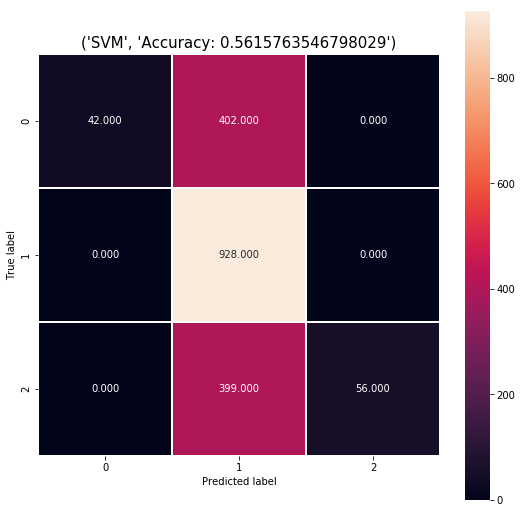

In [45]:
print_matrix(cm_svm, accuracy_svm, model='SVM')

### SVM - SVC (Robust Scaler)

In [46]:
robut_scaler = RobustScaler().fit(X_train)

X_train_transform = robut_scaler.fit_transform(X_train)
X_test_transform = robut_scaler.transform(X_test)

clf.fit(X_train_transform, y_train)
clf.score(X_test, y_test)
y_pred_transform = clf.predict(X_test_transform)

accuracy_svm_Robust = metrics.accuracy_score(y_test, y_pred_transform)

print("SVM Robust - Accuracy:", accuracy_svm_Robust)

/home/miriam/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM Robust - Accuracy: 1.0


### Logistic Regression 

In [47]:
clf_logistic = linear_model.LogisticRegression() #multi_class='multinomial', solver='lbfgs'
clf_logistic.fit(X_train, y_train)
score = clf_logistic.score(X_test, y_test)
y_pred_logistic = clf_logistic.predict(X_test)

accuracy_logistic = metrics.accuracy_score(y_test, y_pred_logistic)

cm_logistic = metrics.confusion_matrix(y_test, y_pred_logistic)


print("Logistic Regression - Accuracy:", accuracy_logistic)

/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression - Accuracy: 0.9594964422550629


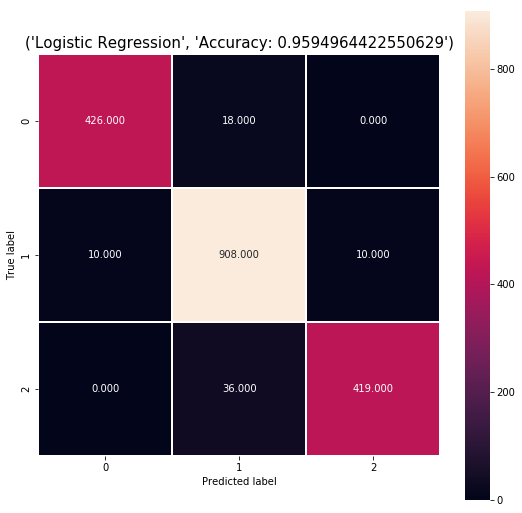

In [48]:
print_matrix(cm_logistic, accuracy_logistic, model='Logistic Regression')

In [49]:
# from sklearn.metrics import classification_report
# print(classification_report(y_test, y_pred))

### Robust Scaler

In [50]:
# Por Hacer ****

### Principal components 

In [51]:
# Principal Components
from sklearn.decomposition import PCA

pca = PCA(n_components=6)

principalComponents = pca.fit_transform(X)

df_pca = pd.DataFrame(data=principalComponents, columns =['pc1', 'pc2','pc3','pc4', 'pc5','pc6'])
display(df_pca.head())
display(df_pca.shape)


X = df_pca
y = df_model['Total Claim Labels']

X_pca = df_pca
y_pca = df_model['Total Claim Labels']

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2)


clf_logistic.fit(X_train_pca, y_train_pca)
clf_logistic.score(X_test_pca, y_test_pca)
y_pred_logistic_pca = clf_logistic.predict(X_test_pca)

accuracy_pca1 = metrics.accuracy_score(y_test_pca, y_pred_logistic_pca)

print ('PCA_1 - Accuracy:', accuracy_pca1)

,pc1,pc2,pc3,pc4,pc5,pc6
0,18585.936413,-5349.049701,65.957055,-44.392062,-14.614736,25.458866
1,-37664.848699,-801.034014,575.950466,-9.404871,-42.477761,1.506097
2,11137.265056,4819.388042,122.144219,-10.547694,-2.977267,20.372182
3,-37658.938458,-140.732647,-29.576576,17.928041,13.218909,-10.421998
4,6149.346549,-5229.546661,-222.989407,-3.170168,7.922040,4.053108


(9134, 6)

/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


PCA_1 - Accuracy: 0.9304871373836892


In [52]:
# Principal Components
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents2 = pca.fit_transform(X)

df_pca2 = pd.DataFrame(data=principalComponents2, columns =['pc1', 'pc2'])
display(df_pca2.head())
display(df_pca2.shape)


X = df_pca2
y = df_model['Total Claim Labels']

X_pca = df_pca2
y_pca = df_model['Total Claim Labels']

X_train_pca2, X_test_pca2, y_train_pca2, y_test_pca2 = train_test_split(X_pca, y_pca, test_size=0.2)


clf_logistic.fit(X_train_pca2, y_train_pca2)
clf_logistic.score(X_test_pca2, y_test_pca2)
y_pred_logistic_pca2 = clf_logistic.predict(X_test_pca2)

accuracy_pca2 = metrics.accuracy_score(y_test_pca, y_pred_logistic_pca2)

print ('PCA_2 - Accuracy:', accuracy_pca2)

,pc1,pc2
0,18585.936413,-5349.049701
1,-37664.848699,-801.034014
2,11137.265056,4819.388042
3,-37658.938458,-140.732647
4,6149.346549,-5229.546661


(9134, 2)

PCA_2 - Accuracy: 0.43349753694581283


/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Cross Validation Score

In [53]:
# https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6

from sklearn.model_selection import KFold 

X_val = df_model[cols]
y_val = df_model['Total Claim Labels']
kf = KFold(n_splits=10)
kf.get_n_splits(X) 

print(kf) 

KFold(n_splits=10, random_state=None, shuffle=False)


In [54]:
for train_index, test_index in kf.split(X):
    print('TRAIN:', train_index, 'TEST:', test_index)
    X_train, X_test = X_val.iloc[train_index], X_val.iloc[test_index]
    y_train, y_test = y_val.iloc[train_index], y_val.iloc[test_index]

TRAIN: [ 914  915  916 ... 9131 9132 9133] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

TRAIN: [   0    1    2 ... 9131 9132 9133] TEST: [2742 2743 2744 2745 2746 2747 2748 2749 2750 2751 2752 2753 2754 2755
 2756 2757 2758 2759 2760 2761 2762 2763 2764 2765 2766 2767 2768 2769
 2770 2771 2772 2773 2774 2775 2776 2777 2778 2779 2780 2781 2782 2783
 2784 2785 2786 2787 2788 2789 2790 2791 2792 2793 2794 2795 2796 2797
 2798 2799 2800 2801 2802 2803 2804 2805 2806 2807 2808 2809 2810 2811
 2812 2813 2814 2815 2816 2817 2818 2819 2820 2821 2822 2823 2824 2825
 2826 2827 2828 2829 2830 2831 2832 2833 2834 2835 2836 2837 2838 2839
 2840 2841 2842 2843 2844 2845 2846 2847 2848 2849 2850 2851 2852 2853
 2854 2855 2856 2857 2858 2859 2860 2861 2862 2863 2864 2865 2866 2867
 2868 2869 2870 2871 2872 2873 2874 2875 2876 2877 2878 2879 2880 2881
 2882 2883 2884 2885 2886 2887 2888 2889 2890 2891 2892 2893 2894 2895
 2896 2897 2898 2899 2900 2901 2902 2903 2904 2905 2906 2907 2908 2909
 2910 2911 2912 2913 2914 2915 2916 2917 2918 2919 2920 2921 2922 2923
 2924 2925 2926 2927 2928 29

TRAIN: [   0    1    2 ... 9131 9132 9133] TEST: [7308 7309 7310 7311 7312 7313 7314 7315 7316 7317 7318 7319 7320 7321
 7322 7323 7324 7325 7326 7327 7328 7329 7330 7331 7332 7333 7334 7335
 7336 7337 7338 7339 7340 7341 7342 7343 7344 7345 7346 7347 7348 7349
 7350 7351 7352 7353 7354 7355 7356 7357 7358 7359 7360 7361 7362 7363
 7364 7365 7366 7367 7368 7369 7370 7371 7372 7373 7374 7375 7376 7377
 7378 7379 7380 7381 7382 7383 7384 7385 7386 7387 7388 7389 7390 7391
 7392 7393 7394 7395 7396 7397 7398 7399 7400 7401 7402 7403 7404 7405
 7406 7407 7408 7409 7410 7411 7412 7413 7414 7415 7416 7417 7418 7419
 7420 7421 7422 7423 7424 7425 7426 7427 7428 7429 7430 7431 7432 7433
 7434 7435 7436 7437 7438 7439 7440 7441 7442 7443 7444 7445 7446 7447
 7448 7449 7450 7451 7452 7453 7454 7455 7456 7457 7458 7459 7460 7461
 7462 7463 7464 7465 7466 7467 7468 7469 7470 7471 7472 7473 7474 7475
 7476 7477 7478 7479 7480 7481 7482 7483 7484 7485 7486 7487 7488 7489
 7490 7491 7492 7493 7494 74

In [55]:
from sklearn.model_selection import KFold, cross_val_score

scores = cross_val_score(clf_logistic, df_model, y, cv=10)
print ('Cross-validated scores:', scores)

/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: 

Cross-validated scores: [0.95956284 0.96393443 0.95519126 0.94972678 0.95837897 0.96495071
 0.94078947 0.94517544 0.95833333 0.95504386]


---------

## Machine Learning 2

In [56]:
df2 = df.copy()
df2.drop(labels=['Total Claim Labels'], axis=1, inplace=True)

In [57]:
df2.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,Washington,2763.519279,No,Basic,Bachelor,734192,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,734168,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,734187,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,734157,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,734171,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [58]:
Total_claim_min = df2['Total Claim Amount'].min()
Total_claim_max = df2['Total Claim Amount'].max()
Total_claim_mean = df2['Total Claim Amount'].mean()
Total_claim_q1 = df2['Total Claim Amount'].quantile(0.25)
Total_claim_q2 = df2['Total Claim Amount'].quantile(0.75)
print(Total_claim_min, Total_claim_max, Total_claim_mean, Total_claim_q1, Total_claim_q2)

0.09900700000000001 2893.239678 434.0887943128969 272.2582445 547.5148387500001


In [59]:
#Labels = 0: Low , Moderate, High
cutoffs = [0, Total_claim_q1, Total_claim_mean, Total_claim_q2, Total_claim_max]
df['Total Claim Labels'] = pd.cut(df['Total Claim Amount'],cutoffs, labels=[0,1,2,4])
print(df['Total Claim Labels'].head())


0    1
1    4
2    4
3    2
4    0
Name: Total Claim Labels, dtype: category
Categories (4, int64): [0 < 1 < 2 < 4]


In [60]:
# Cambiar tipo
df['Total Claim Labels'] = df['Total Claim Labels'].astype('int64')
df['Total Claim Labels'].dtype

dtype('int64')

In [61]:
df['Total Claim Labels'].isna().sum()

0

### Train/ Test 2

In [62]:
columns=[col for col in df2.columns if df2[col].dtype == object]

df_model2 = pd.get_dummies(data=df, columns = columns, drop_first=True)

In [251]:
cols = [col for col in df_model2.columns if col != ['Total Claim Labels']]
X = df_model2[cols]
y_tr = label_binarize(df_model2['Total Claim Labels'], classes=[0,1,2,3])
n_classes = 4


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


### Logistic Regression  2

In [222]:
clf_logistic = linear_model.LogisticRegression() #multi_class='multinomial', solver='lbfgs'
clf_logistic.fit(X_train, y_train)
score2 = clf_logistic.score(X_test, y_test)
y_pred_logistic2 = clf_logistic.predict(X_test)

accuracy_logistic2 = metrics.accuracy_score(y_test, y_pred_logistic2)

cm_logistic = metrics.confusion_matrix(y_test, y_pred_logistic2)


print("Logistic Regression - Accuracy:", accuracy_logistic2)

/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Logistic Regression - Accuracy: 0.789272030651341


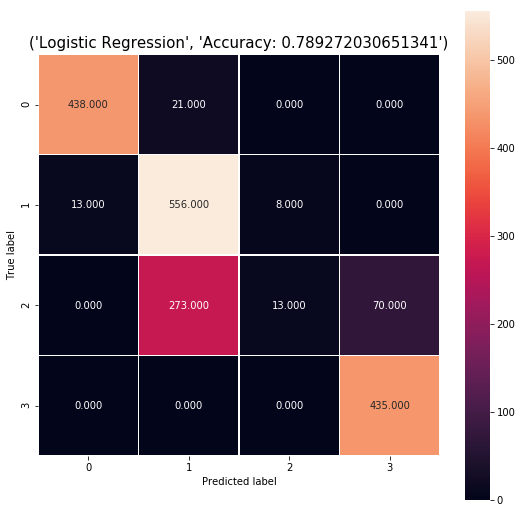

In [223]:
print_matrix(cm_logistic, accuracy_logistic2, model='Logistic Regression')

### SVM - SVC Grid Search

In [224]:
clf = svm.SVC()
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [225]:
from sklearn.model_selection import GridSearchCV

In [226]:
parameters = {'C':[10, 20], 'gamma':('auto', 'scale'), 'coef0': [0.0, 0.1]}

svc_grid = svm.SVC()
clf2 = GridSearchCV(svc_grid, parameters, cv=5)

clf2.fit(X_train, y_train)

clf2.best_params_

{'C': 20, 'coef0': 0.0, 'gamma': 'scale'}

### SVM - SVC 2

In [227]:
clf = svm.SVC()
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [252]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


clf = svm.SVC(C=20, gamma='scale', coef0=0.0)
clf.fit(X_train, y_train)
print('Score:', clf.score(X_test, y_test))
print('Intercept:', clf.intercept_)

y_pred1 = clf.predict(X_test)


accuracy_svm = metrics.accuracy_score(y_test, y_pred1)
print('Accuracy SVM:', accuracy_svm)

Score: 0.8319649698960043
Intercept: [-0.04704656  0.22092245 -0.01846435  0.28139964 -0.01112854 -0.24958182]
Accuracy SVM: 0.8319649698960043


In [253]:
cm_svm = metrics.confusion_matrix(y_test, y_pred1)

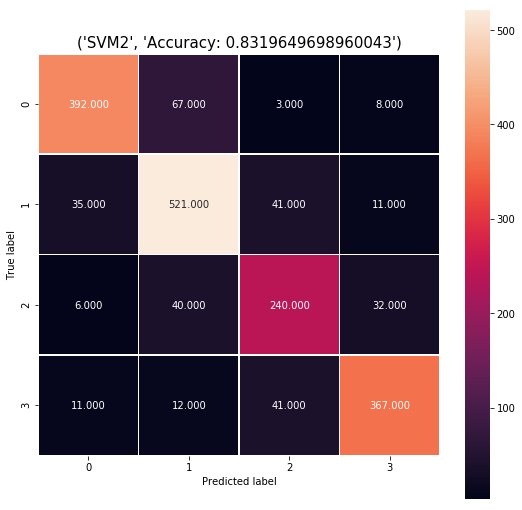

In [254]:
print_matrix(cm_svm, accuracy_svm, model='SVM2')

In [256]:
n_classes = 4

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred1[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(roc_auc[i])

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    #plt.plot([0, 1], [0, 1], 'k--')
    #plt.xlim([0.0, 1.0])
    #plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

ValueError: Can only tuple-index with a MultiIndex

### Random Forest 

In [231]:
cols = [col for col in df_model2.columns if (col != ['Total Claim Labels']) and (col != ['Montly Premium Auto'])]
X = df_model2[cols]
y = df_model2['Total Claim Labels']

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2)


In [232]:
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [233]:

ks_rf = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

y_pred_test_rf = ks_rf.predict(X_test)


accuracy_random = metrics.accuracy_score(y_test, y_pred_test_rf)

print('Accuracy SVM:', accuracy_random)

Accuracy SVM: 0.9978106185002736


In [234]:
cm_random = metrics.confusion_matrix(y_test, y_pred_test_rf)

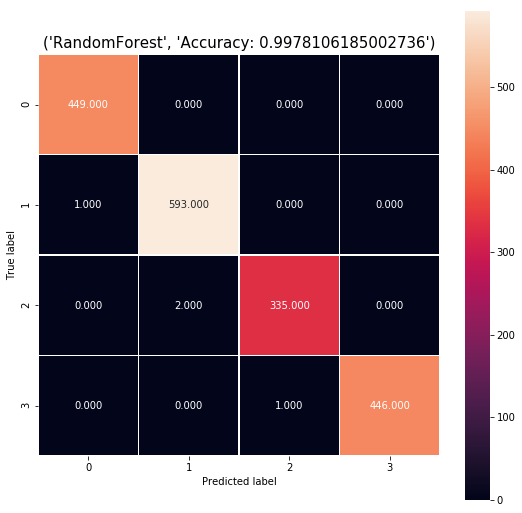

In [235]:
print_matrix(cm_random, accuracy_random, model='RandomForest')

## Cross Validation Random

In [236]:
scores = cross_val_score(ks_rf, df_model2, y, cv=6)
print ('Cross-validated scores:', scores)

Cross-validated scores: [0.9980315  0.99868766 0.9993434  1.         1.         1.        ]


#### ROC CURVE

In [237]:
y_tr = label_binarize(y, classes=[0,1,2,3])
n_classes = 3
X_train_tr, X_test_tr, y_train_tr, y_test_tr =train_test_split(X, y_tr, test_size=0.33, random_state=0)


ks_rf = RandomForestClassifier(n_estimators=10).fit(X_train_tr, y_train_tr)

y_pred_test_rf = ks_rf.predict(X_test_tr)

1.0
0.9994623655913979
0.9982174688057042
nan


/home/miriam/.local/lib/python3.6/site-packages/sklearn/metrics/ranking.py:656: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


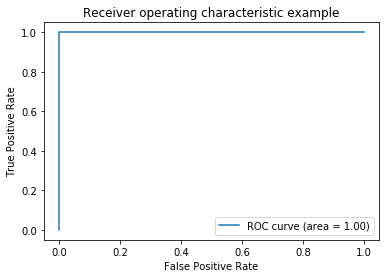

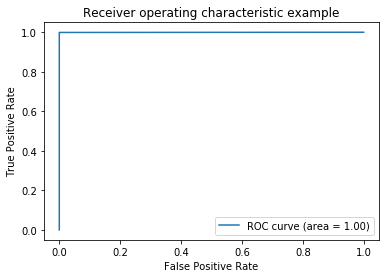

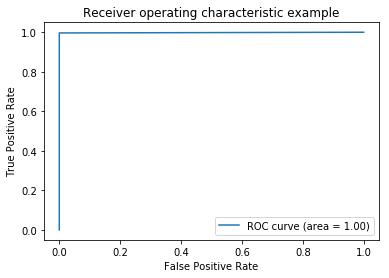

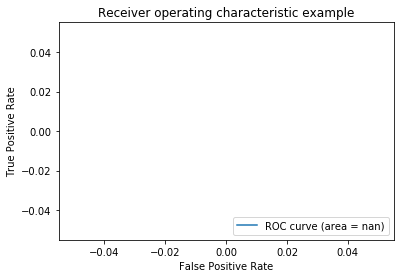

In [261]:
n_classes = 4

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_tr[:,i], y_pred_test_rf[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print(roc_auc[i])

for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

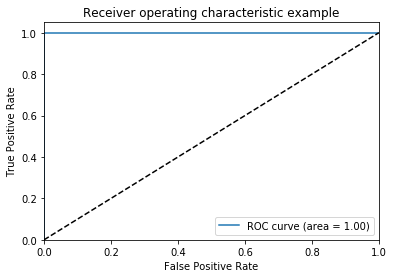

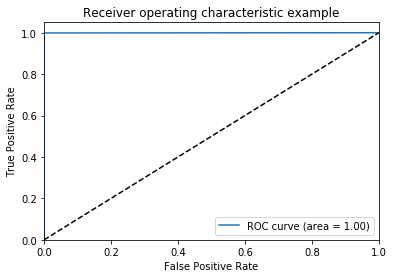

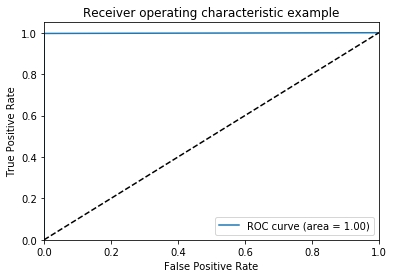

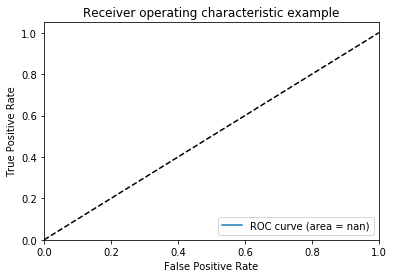

In [262]:
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Grid Search - Random Forest

In [240]:
parameters = {'C':[10, 20], 'gamma':('auto', 'scale')}

svc_grid = svm.SVC()
clf2 = GridSearchCV(svc_grid, parameters, cv=5)

clf2.fit(X_train, y_train)

clf2.best_params_

{'C': 20, 'gamma': 'scale'}